# Central Limit Theorem and Sampling Distributions

- The Central Limit Theorem states that the sampling distribution of the sampling means approaches a normal distribution as the sample size gets larger, no matter what the shape of the population distribution
- The more samples, and the larger the samples, the more the graph of the sample means will look like a normal distribution
-  Average of sample means will be the population mean. If all of the samples means are added up, the average will be the actual population mean
- The sample standard deviation will always go down (Larger the sample size, lower the SD)
    - Theoretical SD of Sample Mean: sigma/sqrt(n)

### All possible samples
- n = count of population
- r = sample size
- C = n! / r!(n-r)!

#### Example: 6 objects
- r1 = 6! / 1!5! = 6
- r2 = 6! / 2!4! = 15
- r3 = 6! / 3!3!= 20
- r4 = 6! / 4!2! = 15
- r5 = 6! / 5!1! = 6
- r6 = 6! / 6!0! = 1

## Example: Student IQ
- Mean = 100
- SD = 15
- Normally Distributed

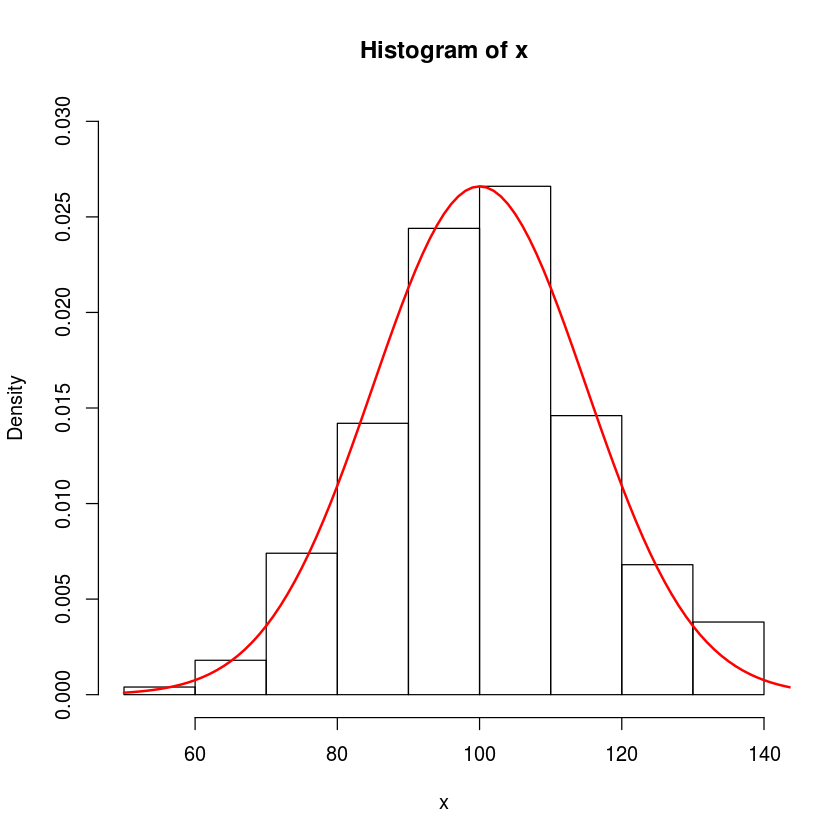

In [1]:
x <- rnorm(500, mean=100, sd=15)
hist(x, prob=TRUE, ylim=c(0,0.03)) #ylim=c(0,0.03): y-axis to 0 - 0.03
curve(dnorm(x, mean=100, sd=15), 50, 150, add=TRUE, lwd=2, col="red") #adds a normal distribution curve
#x-axis: 50-150 (optional)
#lwd=2, specifies thickness

In [2]:
mean(x)

[1] 100.6151

- Mean close to 100

### Sample size = 9.  Compute Mean of  sample (xbar)

In [3]:
x <- rnorm(9, mean=100, sd=15)
mean(x)

[1] 102.9567

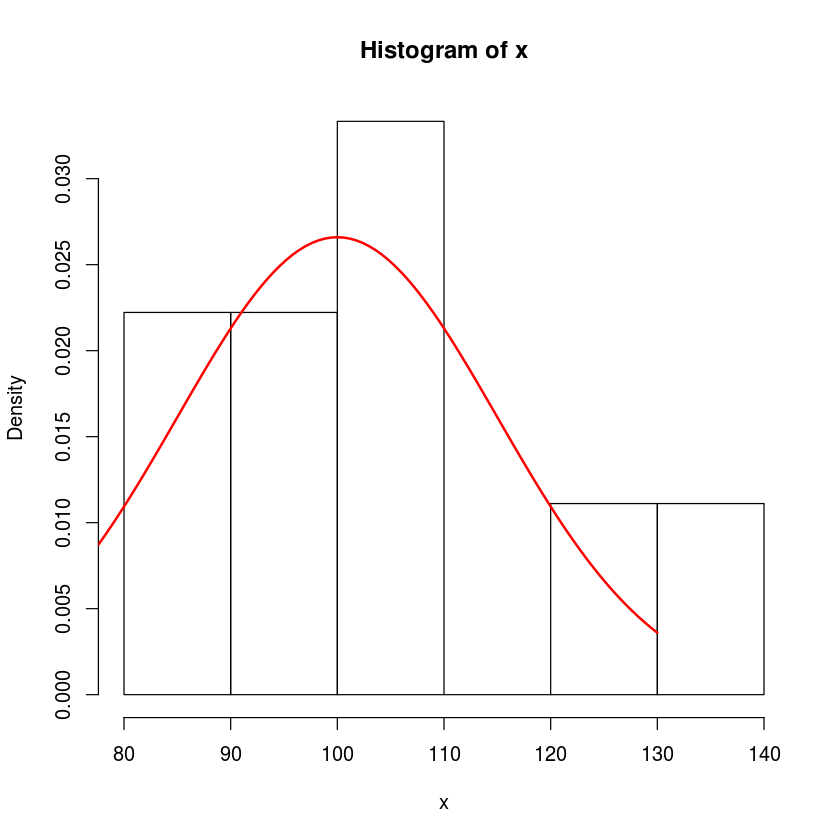

In [4]:
hist(x, prob=TRUE) 
curve(dnorm(x, mean=100, sd=15), 70, 130, add=TRUE, lwd=2, col="red") 

## Build Sampling Distribution:
- Sample size = 9
- Number of samples = 20
- Mean = 100
- Sigma (SD) = 15

In [5]:
mu <- 100
sigma <- 15
n <- 9

#### Create empty vector of zeros, with 9 elements containing zeros

In [6]:
xbar <- rep(0, 20)
xbar

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

#### Use a loop to take Mean of 20 samples from the parent population (insert each into a new vector xbar)
- Sample Size = 9

In [7]:
for (i in 1:20){
    xbar[i] <- mean(rnorm(n, mean=mu, sd=sigma))
}

In [8]:
xbar

[1]  99.33059 103.16744  94.26807 100.05345 101.01392 100.50053  99.06082
 [8]  93.53589  98.65731 105.82573  97.68548 100.24468 100.13119 109.05191
[15]  95.38249 104.81770  96.27074  98.22173  99.67838  96.52040

#### Compute mean of xbar

In [9]:
mean(xbar)

[1] 99.67092

- Mean of Means is very close to the actual Mean (100)

#### Plot in histogram 

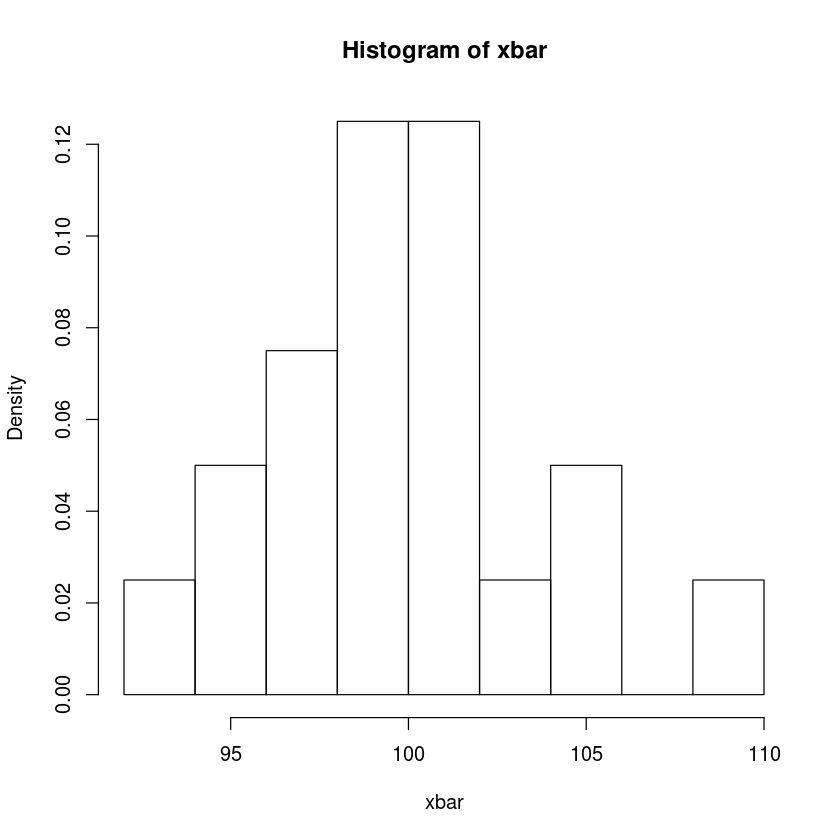

In [16]:
hist(xbar, prob=TRUE) 

### Compare with 10,000 samples
- Sample size = 9

In [17]:
xbar <- rep(0, 10000)
for (i in 1:10000){
    xbar[i] <- mean(rnorm(n, mean=mu, sd=sigma))
}

In [18]:
mean(xbar)

[1] 99.99099

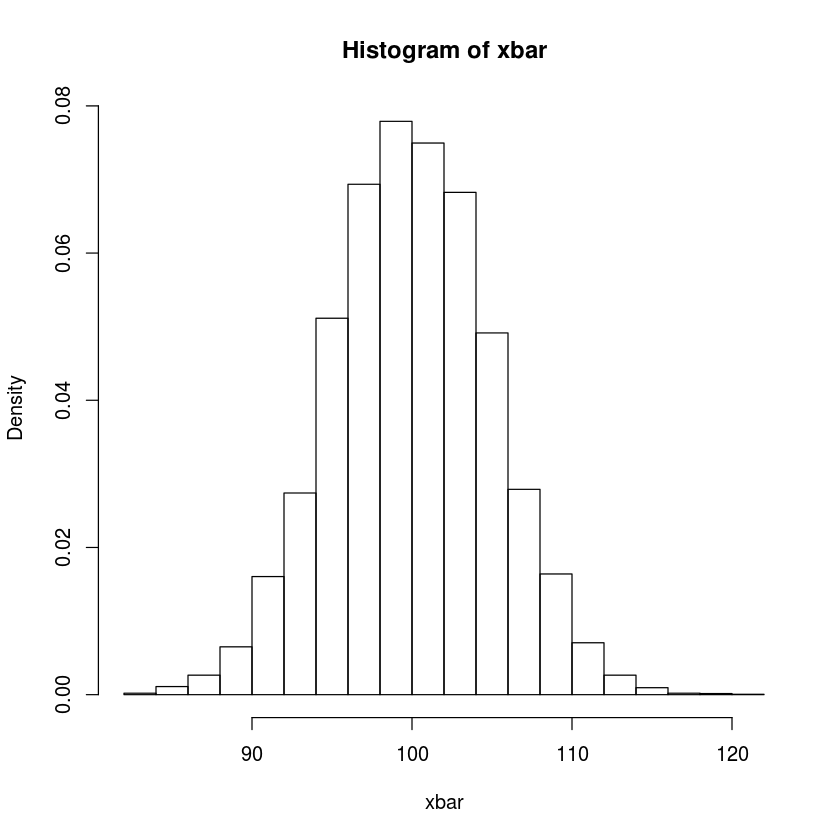

In [19]:
hist(xbar, prob=TRUE) 

### Standard Deviation of the Sampling Distributiion is SD of population / sqrt(Sample Size): sd/sqrt(n)
- SD of Sampling Distribution will decrease with increase in Sample Size

In [20]:
sd(xbar)

[1] 4.95451

In [21]:
sigma/sqrt(9)

[1] 5

<hr>

# Central Limit Theorem when population is Not Normally Distributed

### Example: Uniform Distribution
- Random numbers between 0 and 10 uniformly distributed
- Mean of the population = 5
- Standard Deviation = 2.889
- Sample Size = 5
- Sample Count = 20

In [22]:
min <- 0
max <- 10
n <- 5

In [23]:
xbar <- rep(0, 20)
for (i in 1:20){
    xbar[i] <- mean(runif(n, min=min, max=max))
}

In [24]:
xbar

[1] 4.146694 4.249749 5.149374 6.609225 6.078256 6.297819 7.826621 4.929041
 [9] 3.819519 4.830165 4.541167 7.366021 3.699160 7.054218 7.035984 3.009137
[17] 2.679907 6.201858 4.123565 6.504333

### Mean of Means from Uniform Distribution is close to Population Mean

In [25]:
mean(xbar)

[1] 5.307591

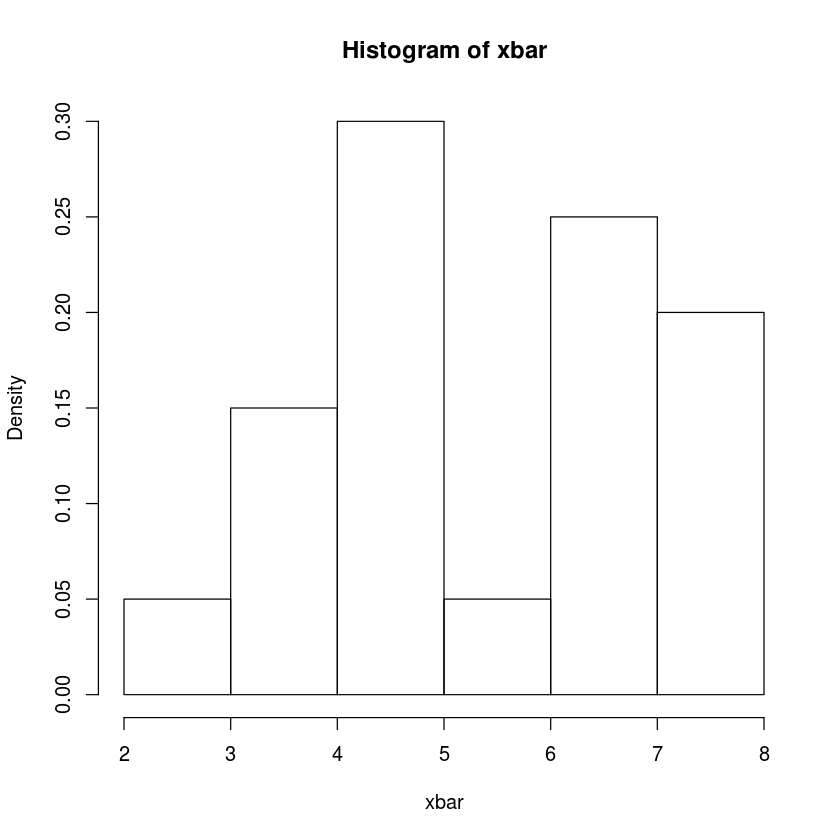

In [26]:
hist(xbar, prob=TRUE) 

### Comapre with 10,000 Sample count:

In [27]:
xbar <- rep(0, 10000)
for (i in 1:10000){
    xbar[i] <- mean(runif(n, min=min, max=max))
}

In [28]:
mean(xbar)

[1] 5.009705

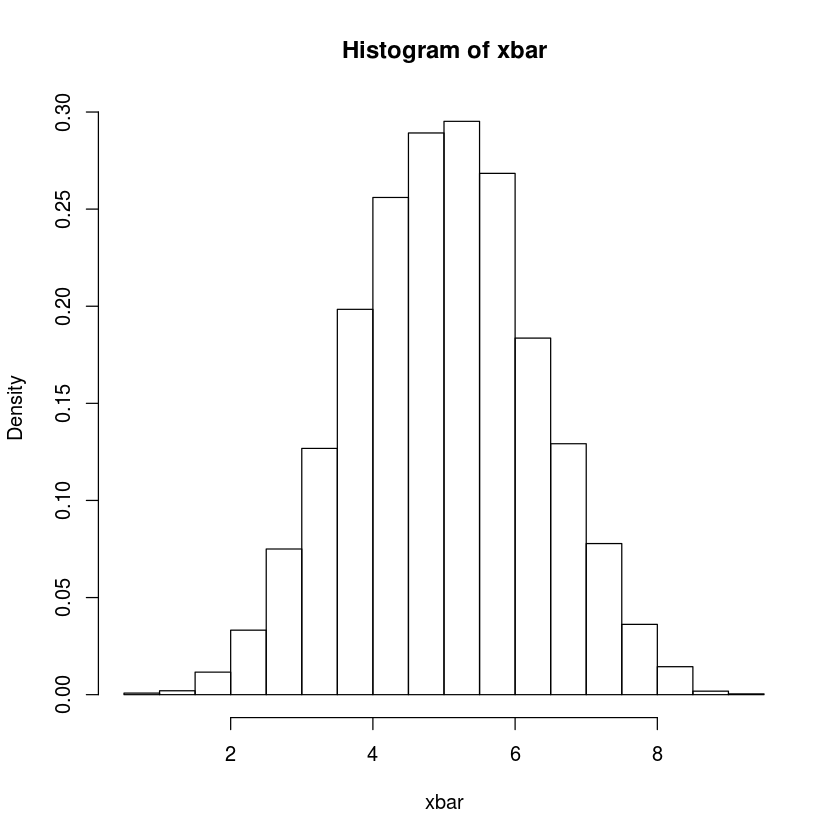

In [29]:
hist(xbar, prob=TRUE) 

### Standard Deviation of the Sampling Distributiion is SD of population / sqrt(Sample Size): sd/sqrt(n)
- SD of Sampling Distribution will decrease with increase in Sample Size

In [30]:
sd(xbar)

[1] 1.28966

In [31]:
2.889/sqrt(5)

[1] 1.292

<hr>

# Regardless of the shape of the underlying population, the sampling distribution of xbar becomes approximately normal as the sample size n, increases.

## Conditions:
- Independence: The sample values must be independent of each other
- Random: The data values must be sampled randomly
- 10% Condition: Sample size should be less than 10% of the population
- Large Sample Size: Sample size should be large enough

### Example:

- Population
    - Mean weight of adult men = 190 lbs
    - Standard Deviation = 59 lbs
- Sampling
    - Random sample size = 10 men
    - Elevator weight limit = 2,500 lbs
    
#### What is the probability that weight of 10 men will exceed weight limit?

In [32]:
mu <- 190
sigma <- 59
n <- 10
sample.sd <- sigma/sqrt(n) #18.66

#### Find z-score for 10 men equaling 2500 lbs (250lb each)

In [33]:
z.score <- (250 - mu) / sample.sd
z.score

[1] 3.215876

#### Find the probability based on the z-score

In [34]:
p.value <- pnorm(z.score, lower.tail=FALSE) 

In [35]:
#lower.tail=FALSE is same as 
1 - pnorm(z.score)

[1] 0.000650236

#### Convert to percentage

In [36]:
p.value * 100

[1] 0.0650236

- 0.07% chance that weight of 10 men will exceed weight limit